<div class="alert alert-block alert-info">
<b> Keywords: ML Linear Regression</b>
    <br>
    * data -> wine  
    <br>
    * AIM-> build a ML model to predict Density,because experimentally it takes an eternity </div>
    
 - **`Data loading`** ->decimal symbol "," 
 - **`EDA`**  
     - Outliers->drop the most evident ones:  OUT of RANGE!     
 - **`Visualizations to check linearity`** -> scatterplot and correlation coefficient (target variable against non-target variables)
 - **`ML models`** -> Steps to follow
    - **`Simple Linear Regression`** -> target and 1 non-target (most correlated variable)
    - **`Multiple Linear Regression `** ->target and +1 non-targets 

# Linear and multilinear regression

**Business case:**  John is the CEO of a winery located in Vilafranca del Penedés. He has three different varieties of wine and people from Quality control make robust measurements regarding different features that define the wines. 

**Problem solving:** build a mathematical model in order to quantify this specific variable on new samples, considering other features from each wine. 
      
      
**Key information:**
- `fixed acidity`: information regarding tartaric acid content (g / dm^3),most acids involved with wine or fixed or nonvolatile (do not evaporate readily). Range [6- 15]
- `volatile acidity`: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. Range[0-1500]
- `citric acid`:found in small quantities, citric acid can add ‘freshness’ and flavor to wines. Range [0-1]
- `residual sugar`:the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet. Range [0-20]
- `chlorides`: the amount of salt in the wine. Range [0-500]
- `free sulfur dioxide`: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. Range [0-750]
- `total sulfur dioxide`:amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. Range [0-250]
- `water_cont`:content of water in the wine. Range [0-100]
- `pH`:describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale. Range [0-14]
- `sulphates`:a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. Range [0-5]
- `alcohol`:the percent alcohol content of the wine. Range [5-20]
- `quality`:quality of the wines based on sensory analysis. Range [1-10]
- `density`:the density of wine is close to that of wine depending on the percent alcohol and sugar content. Range [1-100]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../../../datasets/3.3.1.2.winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
0,"10,3729451124309","0,7",0,"1,9",76,11,34,"0,9978","3,51","0,56","9,4",5.0,15.0
1,"9,32846072267732","0,88",0,"2,6",98,25,67,"0,9968","3,2","0,68","9,8",5.0,13.0
2,"9,5949801997539","0,76","0,04","2,3",92,15,54,997,"3,26","0,65","9,8",5.0,12.0
3,"10,8723795304885","0,28","0,56","1,9",75,17,60,998,"3,16","0,58","9,8",6.0,18.0
4,"10,029247902707","0,7",0,"1,9",76,11,34,"0,9978","3,51","0,56","9,4",5.0,17.0


In [3]:
data = pd.read_csv('../../../datasets/3.3.1.2.winequality-red.csv', 
                   decimal= ",")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
0,10.372945,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,15.0
1,9.328461,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,13.0
2,9.594980,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8,5.0,12.0
3,10.872380,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8,6.0,18.0
4,10.029248,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,17.0


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'water_cont', 'pH', 'sulphates', 'alcohol', 'quality', 'density'],
      dtype='object')

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
0,10.372945,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,15.0
1,9.328461,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,13.0
2,9.594980,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8,5.0,12.0
3,10.872380,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8,6.0,18.0
4,10.029248,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,17.0


In [8]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
1048570,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   fixed acidity         1599 non-null     float64
 1   volatile acidity      1048575 non-null  float64
 2   citric acid           1599 non-null     float64
 3   residual sugar        1599 non-null     float64
 4   chlorides             1599 non-null     float64
 5   free sulfur dioxide   1599 non-null     float64
 6   total sulfur dioxide  1599 non-null     float64
 7   water_cont            1599 non-null     float64
 8   pH                    1599 non-null     float64
 9   sulphates             1599 non-null     float64
 10  alcohol               1599 non-null     float64
 11  quality               1599 non-null     float64
 12  density               1599 non-null     float64
dtypes: float64(13)
memory usage: 104.0 MB


In [11]:
data.isnull().sum()

fixed acidity           1046976
volatile acidity              0
citric acid             1046976
residual sugar          1046976
chlorides               1046976
free sulfur dioxide     1046976
total sulfur dioxide    1046976
water_cont              1046976
pH                      1046976
sulphates               1046976
alcohol                 1046976
quality                 1046976
density                 1046976
dtype: int64

In [12]:
data.dropna(inplace=True)
data.shape

(1599, 13)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   water_cont            1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
 12  density               1599 non-null   float64
dtypes: float64(13)
memory usage: 174.9 KB


# Exploratory Data Analysis and Data cleaning

**Key information:**
- `fixed acidity`: Range [6- 15]
- `volatile acidity`: Range[0-1500]
- `citric acid`: Range [0-1]
- `residual sugar`:Range [0-20]
- `chlorides`: Range [0-500]
- `free sulfur dioxide`: Range [0-750]
- `total sulfur dioxide`: Range [0-250]
- `water_cont`: Range [0-100]
- `pH`: Range [0-14]
- `sulphates`:Range [0-5]
- `alcohol`:Range [5-20]
- `quality`:Range [1-10]
- `density`: Range [1-100]

In [170]:
var = data.describe().T
#var['min']
var[['min', 'max']]

,min,max
fixed acidity,6.385224,16.950275
volatile acidity,0.120000,1185.000000
citric acid,0.000000,1.000000
residual sugar,0.900000,15.500000
chlorides,0.050000,611.000000
free sulfur dioxide,1.000000,72.000000
total sulfur dioxide,6.000000,289.000000
water_cont,0.990070,1001.000000
pH,2.740000,4.010000
sulphates,0.330000,2.000000


## Check duplicates

In [171]:
data.duplicated().sum()

0

## Check Outliers

In [17]:
import plotly.graph_objs as go
def OutLiersBox(df,nameOfFeature):
    """
    Function to create a BoxPlot and visualise:
    - All Points in the Variable
    - Suspected Outliers in the variable

    """
    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all', #define that we want to plot all points
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    
    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers', # define the suspected Outliers
        marker = dict(
            color = 'rgba(219, 64, 82, 0.6)',
            #outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )


    data = [trace0,trace1]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    fig.show()

In [19]:
for col in data.columns:
    OutLiersBox(data,col)

We are not going to drop ALL outliers, just the most evident ones

- Suspected Outliers:
    
    `chlorides`(a unique value that is approx 640) -> OUT of RANGE!
    
    `total sulfur dioxides`(two values between 250-300 ) -> OUT of RANGE!
    
    `water_cont`(values higher than 100) -> OUT of RANGE!
    
    `fixed acidity`(values higher than 15) -> OUT of RANGE!

In [20]:
data = data[data['chlorides'] <= 500]
data['chlorides'].max()

467.0

In [21]:
data = data[data['total sulfur dioxide'] <= 250]
data['total sulfur dioxide'].max()

165.0

In [22]:
data = data[data['water_cont'] <= 100]
data['water_cont'].max()

1.00369

In [23]:
data = data[data['fixed acidity'] <= 15]
data['fixed acidity'].max()

14.9390740902266

In [24]:
# Let's check the dataset after dropping those outliers
data.shape

(1496, 13)

## Visual exploration
### Scatter plot of all variables against the target variable

In [25]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'water_cont', 'pH', 'sulphates', 'alcohol', 'quality', 'density'],
      dtype='object')

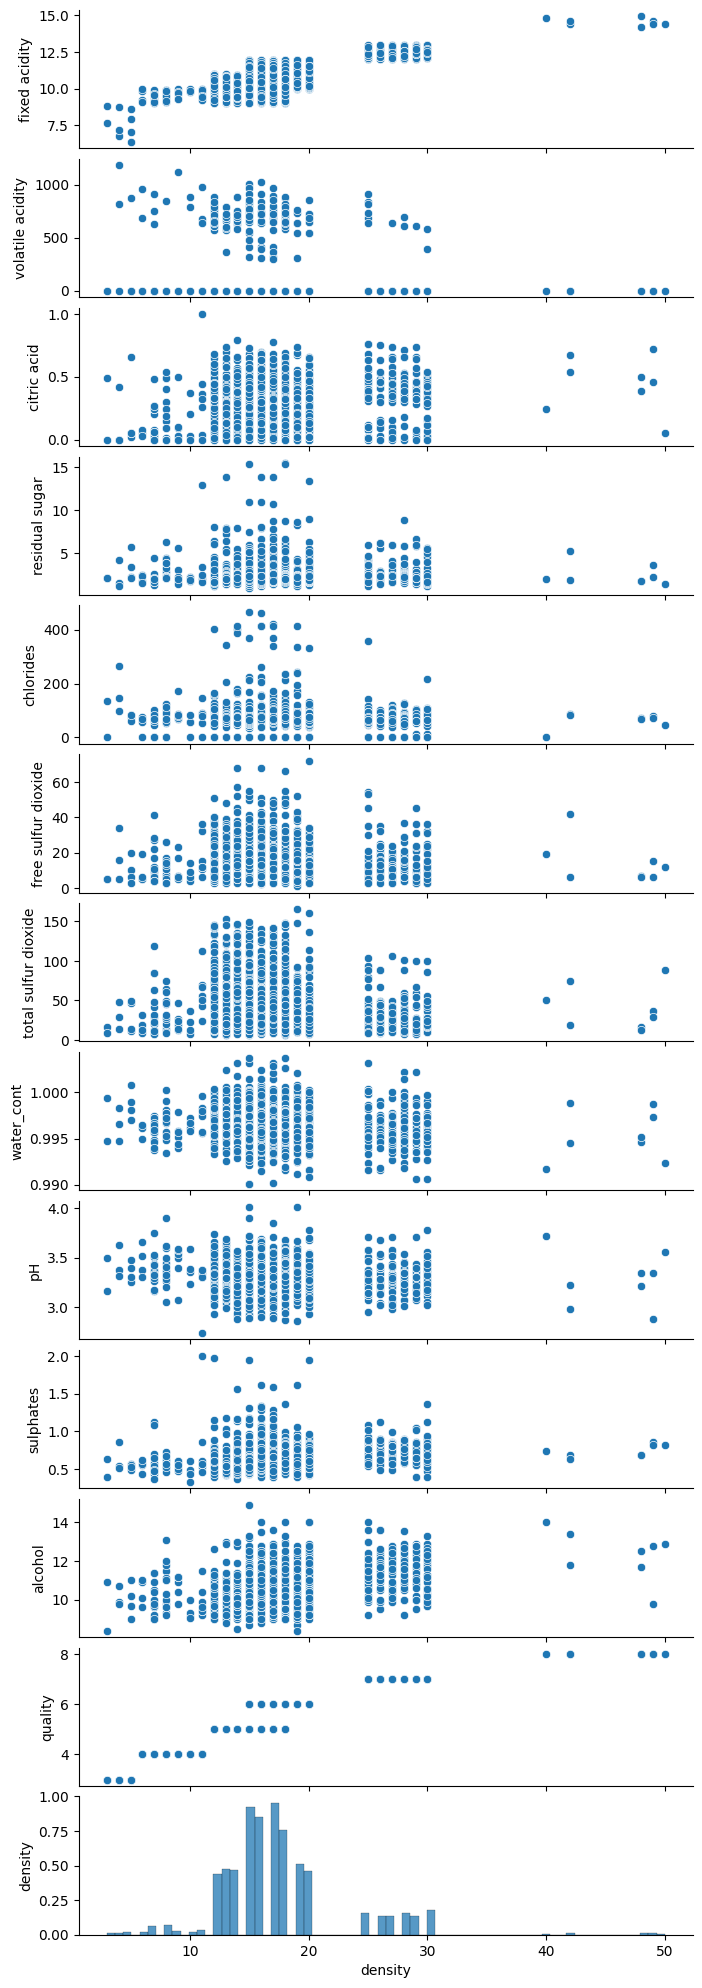

In [26]:
g = sns.pairplot(data, y_vars= data.columns.values, x_vars='density')
g.fig.set_size_inches(10,20)

    Strong linearilty  with: fixed_acidity and quality!!

### CorrMatrx

In [30]:
data_corr = data.corr()#[['density']].sort_values('density', ascending= False)
data_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality,density
fixed acidity,1.000000,-0.127104,0.211181,0.006646,-0.081529,-0.057044,-0.182483,-0.150747,-0.035511,0.191046,0.419313,0.843460,0.757254
volatile acidity,-0.127104,1.000000,-0.183911,0.015668,0.039222,-0.057956,-0.017594,0.030517,0.035763,-0.069927,-0.080036,-0.152575,-0.120736
citric acid,0.211181,-0.183911,1.000000,0.125379,0.152949,-0.071229,0.018650,0.370744,-0.535452,0.312725,0.094966,0.213599,0.208745
residual sugar,0.006646,0.015668,0.125379,1.000000,0.064330,0.181712,0.177144,0.368695,-0.075175,0.001565,0.016818,-0.002104,0.017754
chlorides,-0.081529,0.039222,0.152949,0.064330,1.000000,-0.024487,-0.000330,0.170981,-0.193983,0.221136,-0.173757,-0.055388,-0.042120
free sulfur dioxide,-0.057044,-0.057956,-0.071229,0.181712,-0.024487,1.000000,0.670164,-0.016066,0.073532,0.046800,-0.081593,-0.059422,-0.058394
total sulfur dioxide,-0.182483,-0.017594,0.018650,0.177144,-0.000330,0.670164,1.000000,0.083675,-0.054532,0.060125,-0.228766,-0.204985,-0.145167
water_cont,-0.150747,0.030517,0.370744,0.368695,0.170981,-0.016066,0.083675,1.000000,-0.356808,0.151356,-0.506037,-0.162900,-0.142096
pH,-0.035511,0.035763,-0.535452,-0.075175,-0.193983,0.073532,-0.054532,-0.356808,1.000000,-0.199817,0.229661,-0.037279,-0.062034
sulphates,0.191046,-0.069927,0.312725,0.001565,0.221136,0.046800,0.060125,0.151356,-0.199817,1.000000,0.084386,0.241585,0.215064


In [31]:
data_corr1= data.corr()[['density']].sort_values('density', ascending= False)
data_corr1

,density
density,1.000000
quality,0.848161
fixed acidity,0.757254
alcohol,0.408171
sulphates,0.215064
citric acid,0.208745
residual sugar,0.017754
chlorides,-0.042120
free sulfur dioxide,-0.058394
pH,-0.062034


In [35]:
def heatmap_triu (df):
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    sns.heatmap(df.corr(), annot=True, mask = mask, vmax=1, vmin=-1,
               cmap=sns.color_palette('RdBu_r', 7))

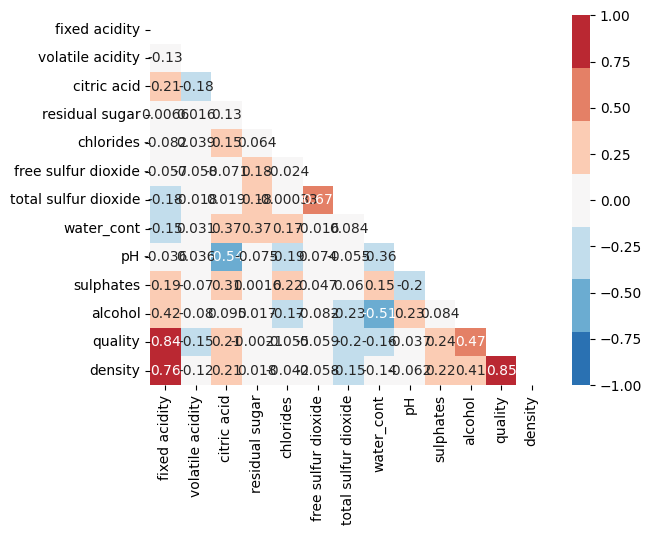

In [36]:
heatmap = heatmap_triu(data)



In [40]:
import plotly.figure_factory as ff

In [41]:
fig = ff.create_scatterplotmatrix(data_corr, diag='box',colormap='Portland',
                                  height=900, width=900)
fig.layout.font.size = 4
fig.show()

# Linear Regression Analysis

    STEPS to follow:

    1. Identify the target or dependent variable
    2. Split data into train / test 
    3. Instantiate the model
    4. Fit the model
    5. Evaluate the model

<img src="images/LRegression.gif" width="500">

## Step 1:  Define the target variable  (the variable/value that you want to predict)

In [42]:
#Let's select the variable that has a higher linear relation with density
X = data['quality']
y = data['density']

In [43]:
X

0       5.0
1       5.0
4       5.0
5       5.0
6       5.0
       ... 
1594    5.0
1595    6.0
1596    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1496, dtype: float64

In [44]:
y

0       15.0
1       13.0
4       17.0
5       18.0
6       15.0
        ... 
1594    18.0
1595    19.0
1596    16.0
1597    18.0
1598    17.0
Name: density, Length: 1496, dtype: float64

## Step 2: Split the data into train and test set

<img src="images/TrainTest.png" width="300">

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 7)

In [46]:
print('Shape of the raw data (X): {}'.format (X.shape))
print('Shape of the TARGET variable (y): {}'.format (y.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (X): (1496,)
Shape of the TARGET variable (y): (1496,)

Shape of the Train data (X_train): (1047,)
Shape of the Train data (y_train): (1047,)

Shape of the Test data (X_test): (449,)
Shape of the TARGET Test data (y_test): (449,)


In [49]:
y_train =  np.array(y_train).reshape(-1, 1)  # values converts it into 
# a numpy array

X_train = np.array(X_train).reshape(-1, 1) 

y_test =  np.array(y_test).reshape(-1, 1)  # values converts it into a 
#numpy array

X_test = np.array(X_test).reshape(-1, 1) 

In [48]:
y_train =  np.array(y_train)
y_train

array([[18.],
       [14.],
       [13.],
       ...,
       [18.],
       [15.],
       [18.]])

In [50]:

y_train

array([[18.],
       [14.],
       [13.],
       ...,
       [18.],
       [15.],
       [18.]])

In [51]:
X_train

array([[6.],
       [5.],
       [5.],
       ...,
       [5.],
       [6.],
       [5.]])

## Step 3-4: Instantiate and fit the model

In [52]:
# Instantiate the model
lm = LinearRegression()

lm.fit(X_train, y_train)
# Model building. In that case, as we are working with Supervised method
# we need to include both datasets in the input of the model

LinearRegression()

In [53]:
lm

LinearRegression()

## Step 5: Evaluate the model

### Check it's coefficients and how we can interpret them.


In [54]:
lm

LinearRegression()

In [55]:
print(lm.coef_)

[[5.48997713]]


In [56]:
# print the intercept
print(f'Intercept of the Linear model: {lm.intercept_}')

Intercept of the Linear model: [-13.5506164]


In [57]:
# y = 5.49x - 13.55 

In [58]:
y_pred = 5.49*5-13.55
y_pred

13.900000000000002

In [201]:
X_test

array([[5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [7.],
       [6.],
       [7.],
       [6.],
       [6.],
       [7.],
       [5.],
       [7.],
       [7.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [5.],
       [7.],
       [6.],
       [5.],
       [6.],
       [5.],
       [5.],
       [8.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [7.],
       [6.],
       [7.],
       [6.],
       [6.],
       [5.],
       [7.],
       [5.],
       [6.],
       [6.],
       [7.],
       [5.],
       [6.],
       [6.],
       [7.],
       [5.],
       [6.],
       [7.],
       [6.],
       [5.],
       [6.],
       [7.],
       [6.],
       [6.],
       [7.],

### Predictions in our test set

  

In [59]:
lm

LinearRegression()

In [60]:
X_test

array([[5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [7.],
       [6.],
       [7.],
       [6.],
       [6.],
       [7.],
       [5.],
       [7.],
       [7.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [5.],
       [7.],
       [6.],
       [5.],
       [6.],
       [5.],
       [5.],
       [8.],
       [6.],
       [5.],
       [5.],
       [6.],
       [6.],
       [6.],
       [5.],
       [5.],
       [6.],
       [5.],
       [6.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [7.],
       [6.],
       [7.],
       [6.],
       [6.],
       [5.],
       [7.],
       [5.],
       [6.],
       [6.],
       [7.],
       [5.],
       [6.],
       [6.],
       [7.],
       [5.],
       [6.],
       [7.],
       [6.],
       [5.],
       [6.],
       [7.],
       [6.],
       [6.],
       [7.],

In [61]:
y_pred = lm.predict(X_test) #for each x in X_test run this y = 5.49x - 13.55
y_pred = np.array(y_pred).reshape(-1, 1) 
print ('The predicted values for your Test test are:', y_pred)

The predicted values for your Test test are: [[13.89926926]
 [13.89926926]
 [13.89926926]
 [13.89926926]
 [13.89926926]
 [24.87922352]
 [19.38924639]
 [24.87922352]
 [19.38924639]
 [19.38924639]
 [24.87922352]
 [13.89926926]
 [24.87922352]
 [24.87922352]
 [19.38924639]
 [19.38924639]
 [13.89926926]
 [13.89926926]
 [19.38924639]
 [13.89926926]
 [19.38924639]
 [19.38924639]
 [13.89926926]
 [13.89926926]
 [19.38924639]
 [19.38924639]
 [19.38924639]
 [13.89926926]
 [13.89926926]
 [24.87922352]
 [19.38924639]
 [13.89926926]
 [19.38924639]
 [13.89926926]
 [13.89926926]
 [30.36920065]
 [19.38924639]
 [13.89926926]
 [13.89926926]
 [19.38924639]
 [19.38924639]
 [19.38924639]
 [13.89926926]
 [13.89926926]
 [19.38924639]
 [13.89926926]
 [19.38924639]
 [13.89926926]
 [13.89926926]
 [13.89926926]
 [13.89926926]
 [13.89926926]
 [24.87922352]
 [19.38924639]
 [24.87922352]
 [19.38924639]
 [19.38924639]
 [13.89926926]
 [24.87922352]
 [13.89926926]
 [19.38924639]
 [19.38924639]
 [24.87922352]
 [13.89926

In [62]:
y_test

array([[14.],
       [12.],
       [16.],
       [17.],
       [15.],
       [26.],
       [19.],
       [25.],
       [18.],
       [15.],
       [30.],
       [15.],
       [26.],
       [29.],
       [16.],
       [19.],
       [18.],
       [14.],
       [20.],
       [16.],
       [20.],
       [20.],
       [17.],
       [16.],
       [19.],
       [16.],
       [17.],
       [12.],
       [12.],
       [30.],
       [19.],
       [17.],
       [15.],
       [12.],
       [12.],
       [42.],
       [17.],
       [13.],
       [18.],
       [18.],
       [15.],
       [18.],
       [18.],
       [18.],
       [17.],
       [14.],
       [16.],
       [14.],
       [12.],
       [15.],
       [13.],
       [16.],
       [27.],
       [16.],
       [25.],
       [20.],
       [15.],
       [16.],
       [25.],
       [18.],
       [15.],
       [20.],
       [27.],
       [17.],
       [19.],
       [15.],
       [29.],
       [18.],
       [16.],
       [28.],
       [17.],
      

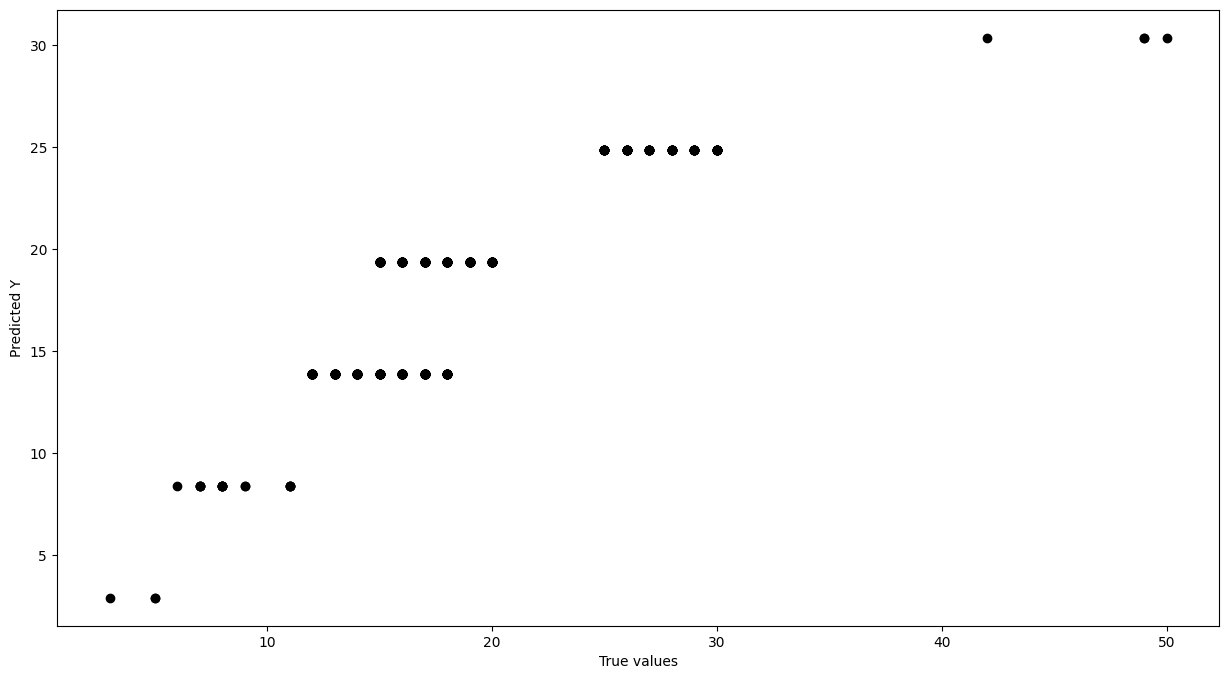

In [63]:
# See the predictions against the real values in a visual way

plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred, color = 'black')

plt.xlabel('True values')
plt.ylabel('Predicted Y')
plt.show()


In [64]:
# Let's arrange a new dataframe with the real (or Actual) values together with the ones predicted by the model
df = pd.DataFrame({'Real': y_test.flatten(), 
                   'Predicted': y_pred.flatten()}) #can use y_test.ravel()
df

,Real,Predicted
0,14.0,13.899269
1,12.0,13.899269
2,16.0,13.899269
3,17.0,13.899269
4,15.0,13.899269
...,...,...
444,14.0,13.899269
445,17.0,13.899269
446,15.0,19.389246
447,16.0,13.899269


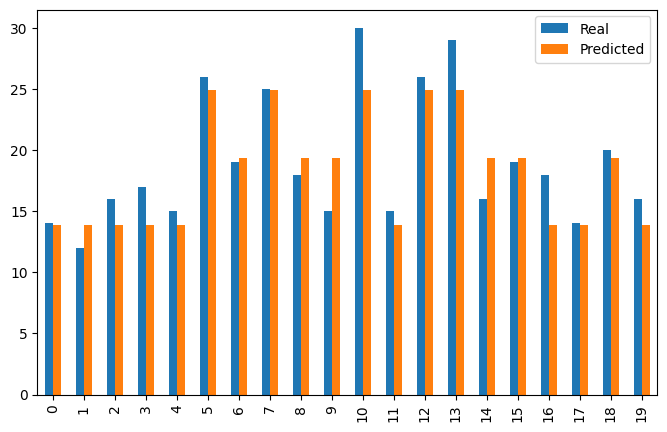

In [66]:
# Le'ts create a bar plot to show the first 20 samples: predictions vs real
df1 = df.head(20)

df1.plot(kind='bar',figsize=(8,5))

plt.show()

In [67]:
# Another way to assess it is just by calculating the means and comparing them
df1 = df.mean()
df1

Real         17.648107
Predicted    17.408453
dtype: float64

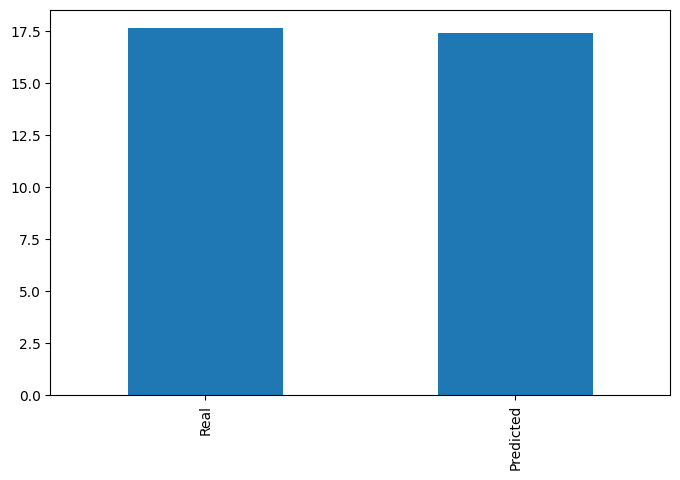

In [68]:
df1.plot(kind='bar',figsize=(8,5))
plt.show()

In [69]:
df.skew()

Real         1.737826
Predicted    0.165491
dtype: float64

### Hypothesis test

    Let's do a hypothesis test to see whether the mean differences are significant from a statistical point of view 
    
**NOTE!!** We are assuming that both variables follow a normal distribution, otherwise we cannot do this test

---   
> We can see that there are slightly differences between both sets of groups, right?
        
Let's do a hypohesis test to clearly detect if they statistically difer

---
**Define the null and alternative hypothesis**

| Hypothesis | Description | Information      
| :- |:-| :-
|`Null Hypothesis`|**$H_0$: $\mu{SMC}$ - $\mu{NSMC}$ = 0**  |  The predicted and actual / real values do not differ significantly, ie the difference between their means is zero  
|`Alternative Hypothesis`| **$H_A$: $\mu{SMC}$ - $\mu{NSMC}$ $\neq$  0**  |  The predicted and actual / real values DO differ significantly, ie the difference between their means is different than zero



Here we select $\alpha$ = 0.05

    Since the standard deviation of the population in not known we carryout independent t test

In [70]:
from scipy.stats import ttest_ind

t_statistic,pval = ttest_ind(df.Real,df.Predicted)
t_statistic

0.6931485118109811

In [71]:
print('p-value obtained for this test',pval)    

p-value obtained for this test 0.48839598371220616


In [72]:
if pval <0.05:
    print(f'Since the p-value is much less than significance level the difference is significant')
    print()
    print('\n We reject the null hypothesis')
    
else:
    print(f'With a p-value of {round(pval,4)} the difference is NOT significant')
    print()
    print('\nWe fail to reject the null hypothesis')

With a p-value of 0.4884 the difference is NOT significant


We fail to reject the null hypothesis


### Metrics to evaluate the performance of the algorithm

The final step is to evaluate the **performance of the algorithm**. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

1. **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors. It is calculated as:

<img src="images/MAE_ - copia.png" width="500">

The **mean absolute error (MAE)** is the simplest regression error metric to understand. We’ll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals

<img src="images/MAE_2 - copia.png" width="500">

Because we use the absolute value of the residual, the MAE does not indicate underperformance or overperformance of the model (whether or not the model under or overshoots actual data). Each residual contributes proportionally to the total amount of error, meaning that larger errors will contribute linearly to the overall erro

**2. Mean Squared Error (MSE)** is the mean of the squared errors and is calculated as:

<img src="images/MSE2.png" width="300">

The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

Because we are squaring the difference, the MSE will almost always be bigger than the MAE. For this reason, we cannot directly compare the MAE to the MSE. We can only compare our model’s error metrics to those of a competing model. The effect of the square term in the MSE equation is most apparent with the presence of outliers in our data. While each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE.

<img src="images/MSE2_.png" width="500">

**3. R_squared** is also known as the Coefficient of Determination, is a value between 0 and 1 that measures how well our regression line fits our data. R-Squared can be interpreted as the percent of variance in our dependent variable that can be explained by our model. The closer R-Squared is to 1 or 100% the better our model will be at predicting our dependent variable.and is calculated as:

<img src="images/R2.png" width="500">

<img src="images/R2_notok.png" width="500">

#### [TEST]

In [73]:
MAE_l = metrics.mean_absolute_error(y_test, y_pred)
MSE_l = metrics.mean_squared_error(y_test, y_pred)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_l = r2_score(y_test, y_pred)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 2.200372272062988
MSE: 9.007437547684082
RMSE: 3.001
R2 Score: 0.7262973921200635


In [74]:
data['density'].describe().T

count    1496.000000
mean       17.417112
std         5.246290
min         3.000000
25%        15.000000
50%        17.000000
75%        19.000000
max        50.000000
Name: density, dtype: float64

In [75]:
X_train

array([[6.],
       [5.],
       [5.],
       ...,
       [5.],
       [6.],
       [5.]])

#### [TRAIN] Cross-Validation

In [76]:
lm_ = LinearRegression() #Let's initialize the method 

cv_scores = cross_val_score(lm_, X_train, y_train,
                            cv=10, scoring='r2') # Let's define the K and the 

cv_scores

array([0.73403644, 0.68579628, 0.70335092, 0.7378964 , 0.69188953,
       0.708618  , 0.67904414, 0.69596967, 0.68303285, 0.74847613])

In [79]:
print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

cv_scores = np.mean(cv_scores).round(3)
print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: 0.71

Average 10-Fold CV R2_score: 0.707


It means model can predict correctly 70% of data

In [80]:
# Let's calculate the metrics with our TRAIN dataset
y_predTrain = lm.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('\n TRAIN metrics\n')
print('MAE:', MAE_lTrain)
print('MSE:', MSE_lTrain)
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', R2_lTrain)
print('-----------------------------------------------------')

print('\n CV- TRAIN metrics\n')
print('R2 Score:', cv_scores)
print('-----------------------------------------------------')
print('\n TEST metrics\n')
print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)


 TRAIN metrics

MAE: 2.1152876020416858
MSE: 7.192413007244367
RMSE: 2.682
R2 Score: 0.7140740774897164
-----------------------------------------------------

 CV- TRAIN metrics

R2 Score: 0.707
-----------------------------------------------------

 TEST metrics

MAE: 2.200372272062988
MSE: 9.007437547684082
RMSE: 3.001
R2 Score: 0.7262973921200635


## How to interpret those values

**Mean Absolute Error** 
* Average of the difference between the Original Values and the Predicted Values.
* Do not gives any idea of the direction of the error i.e. whether we are under predicting the data or over predicting the data.
* Smaller the MAE, better is the model.
* Range (0, + infinity]

**Mean Squared Error**
+ Takes the average of the square of the difference between the original values and the predicted values.
+ As we take square of the error, the effect of larger errors(sometimes outliers) become more pronounced then smaller error. Model will be penalized more for making predictions that differ greatly from the corresponding actual value.
+ Before applying MSE, we must eliminate all nulls/infinites from the input.
+ Range (0, + infinity]


## Let's redo the linear regression with another variable: sulphates

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1496 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1496 non-null   float64
 1   volatile acidity      1496 non-null   float64
 2   citric acid           1496 non-null   float64
 3   residual sugar        1496 non-null   float64
 4   chlorides             1496 non-null   float64
 5   free sulfur dioxide   1496 non-null   float64
 6   total sulfur dioxide  1496 non-null   float64
 7   water_cont            1496 non-null   float64
 8   pH                    1496 non-null   float64
 9   sulphates             1496 non-null   float64
 10  alcohol               1496 non-null   float64
 11  quality               1496 non-null   float64
 12  density               1496 non-null   float64
dtypes: float64(13)
memory usage: 163.6 KB


In [82]:
#Let's select the variable that has a higher linear relation with Density
X = data.sulphates
y = data['density']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

y_train =  np.array(y_train).reshape(-1, 1)  # values converts it into a numpy array
X_train = np.array(X_train).reshape(-1, 1) 

y_test =  np.array(y_test).reshape(-1, 1)  # values converts it into a numpy array
X_test = np.array(X_test).reshape(-1, 1) 

In [84]:
from sklearn.linear_model import LinearRegression
LReg2 = LinearRegression()
LReg2.fit(X_train, y_train)

LinearRegression()

In [85]:
y_pred = LReg2.predict(X_test)
y_pred = np.round_(y_pred)
y_pred

array([[17.],
       [17.],
       [17.],
       [18.],
       [19.],
       [16.],
       [17.],
       [17.],
       [17.],
       [17.],
       [17.],
       [18.],
       [18.],
       [17.],
       [19.],
       [20.],
       [18.],
       [16.],
       [18.],
       [17.],
       [17.],
       [17.],
       [17.],
       [18.],
       [17.],
       [18.],
       [19.],
       [16.],
       [16.],
       [17.],
       [17.],
       [17.],
       [17.],
       [19.],
       [17.],
       [17.],
       [17.],
       [17.],
       [19.],
       [16.],
       [16.],
       [17.],
       [18.],
       [17.],
       [17.],
       [17.],
       [17.],
       [18.],
       [17.],
       [18.],
       [20.],
       [17.],
       [18.],
       [17.],
       [17.],
       [17.],
       [17.],
       [17.],
       [17.],
       [19.],
       [17.],
       [18.],
       [19.],
       [17.],
       [21.],
       [18.],
       [16.],
       [17.],
       [17.],
       [21.],
       [17.],
      

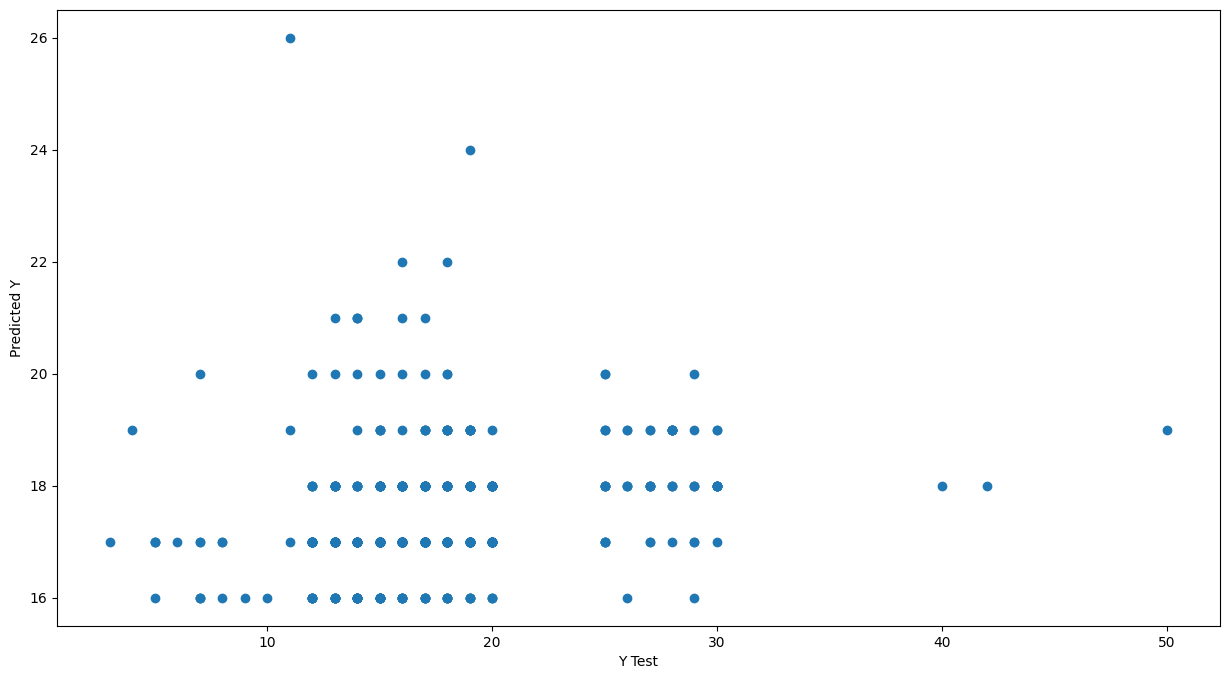

In [86]:
# Visual way to see the predicted values vs the real values
plt.figure(figsize=(15,8))
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [87]:
print('Intercept of the Linear model', LReg2.intercept_)
print('Slope', LReg2.coef_)

Intercept of the Linear model [13.16777737]
Slope [[6.52140278]]


In [88]:
lm.coef_

array([[5.48997713]])

In [89]:
MAE_l2 = metrics.mean_absolute_error(y_test, y_pred)
MSE_l2 = metrics.mean_squared_error(y_test, y_pred)
RMSE_l2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_l2 = r2_score(y_test, y_pred)

print('\nFigures of merit Linear Regression Model of variable sulphates: \n')
print('MAE:', round(MAE_l2,3))
print('MSE:', round(MSE_l2,3))
print('RMSE:', round(RMSE_l2,3))
print("R2 Score: ", R2_l2)


Figures of merit Linear Regression Model of variable sulphates: 

MAE: 3.49
MSE: 25.486
RMSE: 5.048
R2 Score:  0.05370680165448327


In [90]:
y_predTrain = LReg2.predict(X_train)

In [91]:
MAE_l2Tr = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_l2Tr = metrics.mean_squared_error(y_train, y_predTrain)
RMSE_l2Tr = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_l2Tr = r2_score(y_train, y_predTrain)

print('\nFigures of merit Linear Regression Model of variable sulphates: \n')
print('MAE:', round(MAE_l2Tr,3))
print('MSE:', round(MSE_l2Tr,3))
print('RMSE:', round(RMSE_l2Tr,3))
print("R2 Score: ", R2_l2Tr)


Figures of merit Linear Regression Model of variable sulphates: 

MAE: 3.557
MSE: 26.574
RMSE: 5.155
R2 Score:  0.04350128114453722


In [92]:
df = pd.DataFrame({'Real': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Real,Predicted
0,13.0,17.0
1,20.0,17.0
2,8.0,17.0
3,16.0,18.0
4,17.0,19.0
...,...,...
489,15.0,18.0
490,17.0,18.0
491,17.0,17.0
492,25.0,17.0


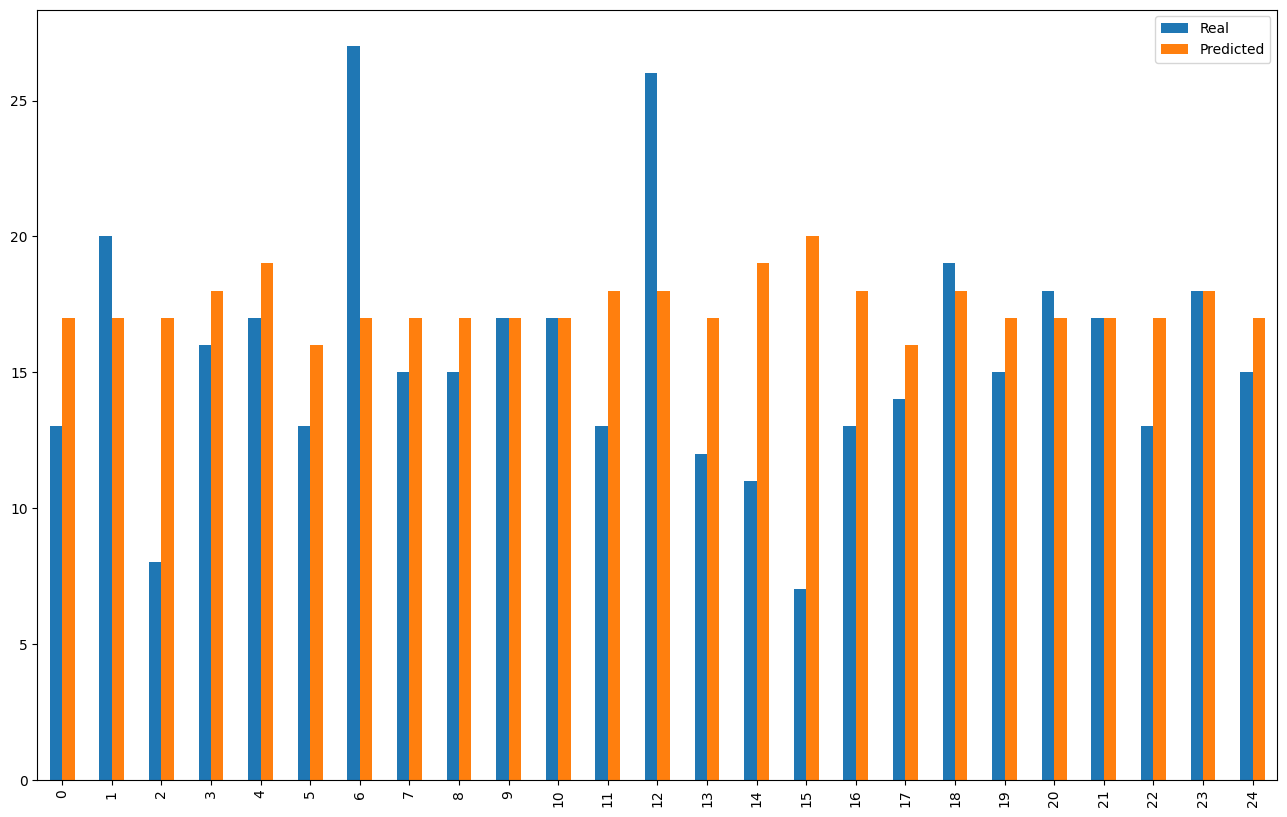

In [93]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

# Multilinear Regression


For this regression model, we will have more than one non-target variable, so that the final equation of the model will be:

 $$ y = b + a1X1 + a2X2 + a3X3 + a4X4 + ...$$, where

- **y**:  target variable
- **X1, X2, X3, X4**: non-target variables
- **b**: intercept
- **a1, a2, a3**:Slopes

## Step 1:  Define the target variable  (the variable/value that you want to predict)

In [99]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'water_cont', 'pH', 'sulphates', 'alcohol', 'quality', 'density'],
      dtype='object')

In [94]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'water_cont', 'pH', 'sulphates', 'alcohol', 'quality']


In [95]:
X = data.drop('density', axis=1)

In [96]:
X = data[features]
y = data['density']

In [103]:
y

0       15.0
1       13.0
4       17.0
5       18.0
6       15.0
        ... 
1594    18.0
1595    19.0
1596    16.0
1597    18.0
1598    17.0
Name: density, Length: 1496, dtype: float64

## Step 2: Split the data into train and test set

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.33, 
                                                    random_state = 7)

In [98]:
print('Shape of the raw data (X): {}'.format (X.shape))
print('Shape of the TARGET variable (y): {}'.format (y.shape))

print('\nShape of the Train data (X_train): {}'.format (X_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (X_test): {}'.format (X_test.shape))
print('Shape of the TARGET Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (X): (1496, 12)
Shape of the TARGET variable (y): (1496,)

Shape of the Train data (X_train): (1002, 12)
Shape of the Train data (y_train): (1002,)

Shape of the Test data (X_test): (494, 12)
Shape of the TARGET Test data (y_test): (494,)


In [99]:
#X_train
#y_train

X_test
#y_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,water_cont,pH,sulphates,alcohol,quality
1561,9.816316,0.600,0.26,2.0,0.08,31.0,131.0,0.99622,3.21,0.52,9.9,5.0
63,9.008950,0.735,0.05,2.0,81.00,13.0,54.0,0.99660,3.39,0.57,9.8,5.0
192,9.684455,0.630,0.12,3.8,99.00,16.0,126.0,0.99690,3.28,0.61,9.5,5.0
1486,10.937216,0.680,0.21,2.1,0.07,9.0,23.0,0.99546,3.38,0.60,10.3,5.0
1095,9.892845,0.400,0.47,2.5,87.00,6.0,20.0,0.99772,3.15,0.50,10.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
172,11.731380,0.420,0.17,2.0,73.00,6.0,18.0,0.99720,3.29,0.61,9.2,6.0
329,9.801027,0.460,0.39,2.0,61.00,7.0,15.0,0.99810,3.18,0.62,9.5,5.0
1447,10.228383,0.670,0.00,1.9,0.08,22.0,39.0,0.99701,3.40,0.74,9.7,5.0
1212,10.818516,0.650,0.02,2.1,78.00,8.0,15.0,0.99498,3.35,0.62,10.4,6.0


## Step 3-4: Instantiate and fit the model

In [100]:
from sklearn.linear_model import LinearRegression
mReg = LinearRegression()
mReg.fit(X_train, y_train)

LinearRegression()

In [101]:
mReg

LinearRegression()

## Step 5: Evaluate the model

In [102]:
print('Intercept of the Linear model', mReg.intercept_)

Intercept of the Linear model 39.75993494957506


In [103]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'water_cont', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [104]:
print(mReg.coef_)

[ 6.65234772e-01  5.45727989e-04  2.29575248e-01  7.01432877e-02
  1.44669559e-03 -3.44472683e-02  1.28775175e-02 -5.69920227e+01
 -2.98739812e-01 -5.84260352e-01  9.71245507e-02  4.83166254e+00]


In [105]:
y_pred = mReg.predict(X_test)
y_pred


array([14.19008101, 13.23604912, 14.64082517, 14.28301281, 13.88408474,
       25.380483  , 19.60644932, 25.27747391, 18.48387409, 19.84729389,
       25.51356746, 13.812096  , 25.28790179, 24.72657574, 18.69990026,
       19.81857993, 12.62133864, 14.71197484, 19.60250014, 13.8935371 ,
       19.33752703, 18.7870901 , 13.57402464, 14.0322076 , 19.21058589,
       18.84085244, 18.47023482, 14.05201974, 13.71573084, 25.74532912,
       19.53415657, 13.31612767, 19.90748865, 13.0181504 , 12.66790831,
       31.22529291, 19.28827258, 13.22344942, 13.92981712, 18.8375108 ,
       19.72206536, 19.84571219, 14.69651685, 13.74588329, 19.63324976,
       14.07221374, 18.96392142, 14.03958913, 13.91414957, 14.44020151,
       13.77958226, 13.71623713, 25.28894525, 19.59915398, 25.20207072,
       19.06793511, 19.98918432, 13.81660398, 26.26404079, 13.07562206,
       19.87907668, 18.45373299, 24.98135374, 13.95447367, 18.92653292,
       19.09650532, 25.43738834, 14.23584727, 19.82444109, 24.43

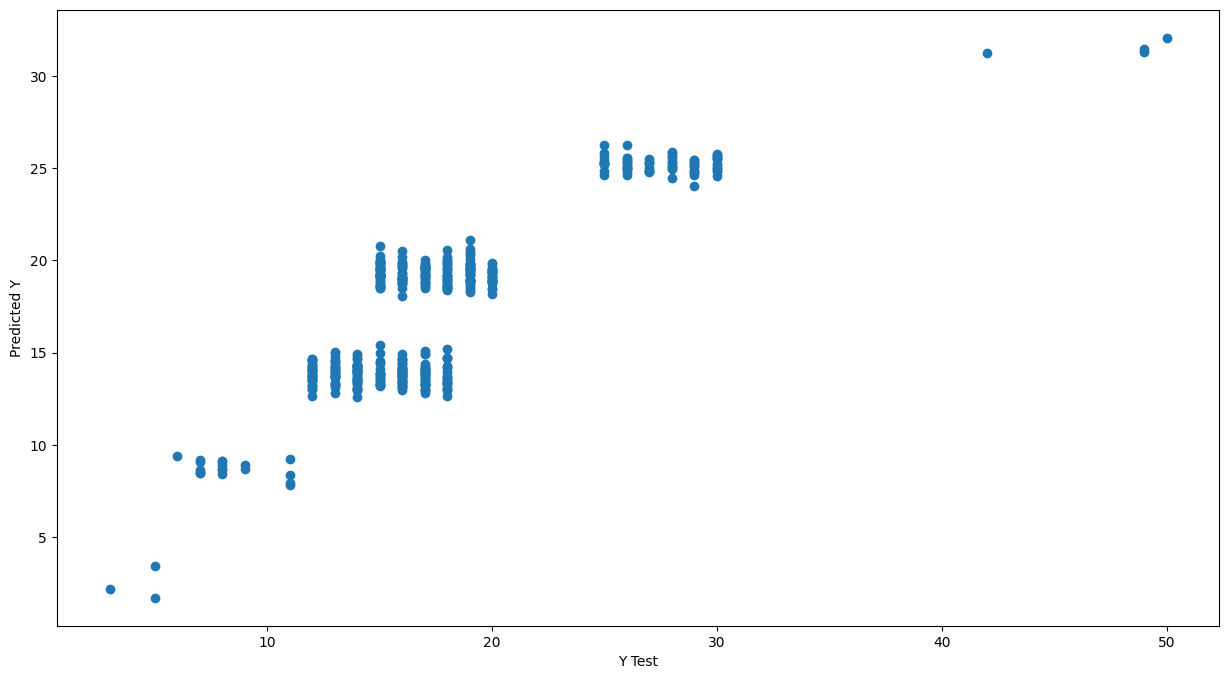

In [106]:
#p Visual way
plt.figure(figsize=(15,8))
plt.scatter(y_test, y_pred)

plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

#### [TEST]

In [107]:
MAE_ml = metrics.mean_absolute_error(y_test, y_pred)
MSE_ml = metrics.mean_squared_error(y_test, y_pred)
RMSE_ml = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_ml = r2_score(y_test, y_pred)

print('MAE:', MAE_ml)
print('MSE:', MSE_ml)
print('RMSE:', round(RMSE_ml,3))
print('R2 Score:', R2_ml)

MAE: 2.205870358536039
MSE: 8.534824618058495
RMSE: 2.921
R2 Score: 0.730742122596034


#### [TRAIN] Cross-Validation

In [108]:
lm_ = LinearRegression() #Let's initialize the method 
cv_scores = cross_val_score(lm_, X_train, y_train,cv=10, scoring='r2') # Let's define the K and the 

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))

cv_scores = np.mean(cv_scores).round(3)
print("\nAverage 10-Fold CV R2_score: {}".format(cv_scores))

Cross Validation R2_score: [0.74 0.68 0.74 0.72 0.71 0.66 0.71 0.7  0.67 0.76]

Average 10-Fold CV R2_score: 0.71


In [109]:
# Let's calculate the metrics with our TRAIN dataset
y_predTrain = mReg.predict(X_train)

MAE_mlTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_mlTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_mlTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_mlTrain = r2_score(y_train, y_predTrain)

print('\n TRAIN metrics\n')
print('MAE:', MAE_mlTrain)
print('MSE:', MSE_mlTrain)
print('RMSE:', round(RMSE_mlTrain,3))
print('R2 Score:', R2_mlTrain)
print('-----------------------------------------------------')

print('\n CV- TRAIN metrics\n')
print('R2 Score:', cv_scores)
print('-----------------------------------------------------')
print('\n TEST metrics\n')
print('MAE:', MAE_ml)
print('MSE:', MSE_ml)
print('RMSE:', round(RMSE_ml,3))
print('R2 Score:', R2_ml)


 TRAIN metrics

MAE: 2.094489830874195
MSE: 6.9705888798418085
RMSE: 2.64
R2 Score: 0.725855150370273
-----------------------------------------------------

 CV- TRAIN metrics

R2 Score: 0.71
-----------------------------------------------------

 TEST metrics

MAE: 2.205870358536039
MSE: 8.534824618058495
RMSE: 2.921
R2 Score: 0.730742122596034


In [110]:
MAE_mreg = metrics.mean_absolute_error(y_test, y_pred)
MSE_mreg = metrics.mean_squared_error(y_test, y_pred)
RMSE_mreg = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_mreg = r2_score(y_test, y_pred)

In [122]:
# Let's calculate the metrics with our TRAIN dataset
y_predTrain = mReg.predict(X_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('\n TRAIN metrics\n')
print('MAE:', MAE_lTrain)
print('MSE:', MSE_lTrain)
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', R2_lTrain)

print('\n TEST metrics\n')
print('MAE:', MAE_mreg)
print('MSE:', MSE_mreg)
print('RMSE:', RMSE_mreg)
print('R2:', R2_mreg)


 TRAIN metrics

MAE: 3.603807581081704
MSE: 27.28954463616085
RMSE: 5.224
R2 Score: 0.039768486804233394

 TEST metrics

MAE: 3.3739397300502763
MSE: 24.119398382202938
RMSE: 4.911150413314882
R2: 0.05966665884931144


# Let's choose the BESt model

In [111]:
## Analysis on the TEST set

print('\nFigures of merit Linear Regression Model of variable sulphates: \n')
print('MAE:', round(MAE_l2,3))
print('MSE:', round(MSE_l2,3))
print('RMSE:', round(RMSE_l2,3))
print('R2:', round(R2_l2,3))

print('\nFigures of merit Linear Regression Model of variable quality: \n')
print('MAE:', round(MAE_l,3))
print('MSE:', round(MSE_l,3))
print('RMSE:', round(RMSE_l,3))
print('R2:', round(R2_l,3))

print('\nFigures of merit Multiple Regression Model: \n')
print('MAE:', round(MAE_mreg,3))
print('MSE:', round(MSE_mreg,3))
print('RMSE:', round(RMSE_mreg,3))
print('R2:', round(R2_mreg,3))


Figures of merit Linear Regression Model of variable sulphates: 

MAE: 3.49
MSE: 25.486
RMSE: 5.048
R2: 0.054

Figures of merit Linear Regression Model of variable quality: 

MAE: 2.2
MSE: 9.007
RMSE: 3.001
R2: 0.726

Figures of merit Multiple Regression Model: 

MAE: 2.206
MSE: 8.535
RMSE: 2.921
R2: 0.731


In [ ]:
#Adjusted R-squared -> 1 - (1-R2_ml_exer)*(len(y_exer_train)-1)/(len(y_exer_train)-X_exer_train.shape[1]-1

# R2 increases depending on the new variables that you include, one way to penalize it is this

# Conclusions

We can see that in Multilinear Regression we managed to increase the accuracy and decrease the errors compared to the Univariate model, but not in a really significant way.

Although the results seem to be fine, the accuracy can be improved by using more complex algorithms, ie SVM-R, RandomForest etc..